## Import data and Read data

In [7]:
import pandas as pd 
import numpy as np
import csv
import re
import nltk
import string
import spacy
nlp = spacy.load('en_core_web_sm')

C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Ritik\anaconda3\envs\ritik\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
import neattext

In [9]:
data=pd.read_csv('Amphan data.csv',encoding='utf-8')

In [10]:
data.head()

,date,id,content,user,reply_count,retweet_count,likecount,quotecount
0,2009-03-12 21:58:55+00:00,1.318518e+09,DiLeMa!!,https://twitter.com/AMPhan,0,0,0,0
1,2021-10-17 04:41:51+00:00,1.449600e+18,@SujibDr Thank Sir for the information. Last d...,https://twitter.com/MrinChemKar,0,0,0,0
2,2021-10-17 03:17:40+00:00,1.449580e+18,@biswajitmohanty when v hav allowed well entre...,https://twitter.com/amphan_may2020,0,0,0,0
3,2021-10-16 23:28:57+00:00,1.449520e+18,อบอุ่น จริง คุณหมอฟัน ฮะเยจิน https://t.co/aBh...,https://twitter.com/r_amphan,0,0,0,0
4,2021-10-16 15:06:12+00:00,1.449390e+18,"From the cities to the villages, Amphan left B...",https://twitter.com/ishadrita,1,0,1,0


In [11]:
data.shape

(134299, 8)

In [12]:
text=pd.DataFrame()

In [13]:
text['content'] = data['content'].copy()

In [14]:
text

,content
0,DiLeMa!!
1,@SujibDr Thank Sir for the information. Last d...
2,@biswajitmohanty when v hav allowed well entre...
3,อบอุ่น จริง คุณหมอฟัน ฮะเยจิน https://t.co/aBh...
4,"From the cities to the villages, Amphan left B..."
...,...
134294,i have ballet on a friday! my plans have been ...
134295,likes orchestra hw!all i have to do is listen ...
134296,gahhhh! homework is frustrating. I'm just gonn...
134297,http://twitpic.com/21jx7 -


In [15]:
df=data.copy()

## DROP DUPLICATES

In [16]:
df=df.drop_duplicates(subset=['content'])

In [17]:
df.shape

(123287, 8)

## LOWER CASING

In [18]:
df['ct'] = df['content'].apply(lambda x: x.lower())


## Remove URLS

In [19]:
df['ct'] = df['ct'].apply(lambda x: neattext.remove_urls(x))


## Removing @tags and removing #symbols and removing any urls

In [20]:
# df['ct'] = df['ct'].apply(lambda x: ' '.join(
#     re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x).split()))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_bad_quotes(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_currencies(x))
# df['ct'] = df['ct'].apply(lambda x: neattext.remove_custom_pattern(x) )
# df['ct'] = df['ct'].apply(lambda x: neattext.remove_custom_words(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_dates(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_emails(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_emojis(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_hashtags(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_html_tags(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_numbers(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_phone_numbers(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_shortwords(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_special_characters(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_urls(x))
df['ct'] = df['ct'].apply(lambda x: neattext.remove_userhandles(x))




## Remove Numbers

In [21]:
df['ct'] = df['ct'].apply(lambda x: re.sub(r'[0-9]', '', x))

## Manual Cleaning 1

In [22]:
def clean(tweets):

    tweets = tweets.split()


    words = ['cyclone', 'bengal', 'amphan', 'cycloneamphan', 'shud', 'ya','pm','imd','india','bangladesh',
    'odisha','cyclonic','km','odia','kompasu','rt','ppl','cud','ai','v','m','hw','gahhhh',
    'da','amp','frm','tw','namo','dr','nt','kt','ndrf','haha','ae','tu','thats','hav','wud',
    'whn','ur','abt','supercyclone','wid','ad','fr','nd','bt','pa','yr','de','di','la','el','en','le',
    'cicl','ke','dont t','welln t','doesn t','fr','hav','westbengal','sir','welcome','back',
    'n','tmc','bjp','u','r','durgapuja','er','e','im','amphancyclone','disaster','response',
    'west','say','know','national','nation','go','see','let','j','pmcares']
   
    for w in list(tweets):
        if w in words:
            tweets.remove(w)


    tweets=" ".join(tweets)
    return tweets






In [23]:

df['ct']=df['ct'].apply(lambda x: clean(x))

In [24]:
df['ct'].head(50)

0                                                dilema
1     sujibdr thank information last heard about pre...
2     biswajitmohanty when allowed well entrenched t...
3                                                      
4     from cities villages left devastated signs cli...
5     what many have mocked claim stardom believe sc...
6     devastated area southwest coast people having ...
7     last three years series cyclones fani april bu...
8     chiriyakhana suvenduwb continue enjoying this ...
9     chiriyakhana suvenduwb okay chal chor chor tak...
10      chiriyakhana suvenduwb chal chor chor taka chor
11    chiriyakhana suvenduwb proudly earn ability li...
12    three cyclones damaged over boats fishing nets...
13    three cyclones damaged over boats fishing nets...
14    view vulnerabilities caused covid disasters li...
15    view vulnerabilities caused covid disasters li...
16    view vulnerabilities caused covid disasters li...
17    view vulnerabilities caused covid disaster

In [25]:
df.shape

(123287, 9)

## Drop Duplicates 2

In [26]:
df = df.drop_duplicates(subset=['ct'])


In [27]:
df.shape

(88526, 9)

## SHORT FORM to abbreviation

https://medium.com/nerd-stuff/python-script-to-turn-text-message-abbreviations-into-actual-phrases-d5db6f489222

In [28]:
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "short.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1

    return ' '.join(user_string) 


In [29]:
# df['ct'] = df['ct'].apply(lambda x: translator(x))


## Manual CLeaning 2

In [30]:
def clean2(tweets):
    tweets=tweets.split()

    words =['s','t','d','b','wb','y','mamata','banerjee','indian','cycloneamphanupdate','amphansupercyclone',
    'cm','th','ha','rs','se','l','k','nisarga','h','amphancyclon','na','ki','didi','ka','hi',
    'ji','wa','p','o','fani','c','del','et','dah','kd','didn','un','ko','ve','hrs','yaas','inde'
            'cyclonealert', 'st', 'que', 'por', 'shah', 'w', 'gt', 'ciclone', 'supercycloneamphan',
            'amphantakachortmc', 'pls','ist','etc','kya','cont','cesc','du','der','cyclonamphanupdates'
            ,'und','zyklon','ja','cyclonamphan','ne','g','al','mph','kda','indien','yg','tha',
            'bengali','bayofbengal','amphancyloneupdate','mamatabanerjee','shri','sdh','nah','plz'
            ,'au','tv','dh','est','ye','lwn','nisarg','il','cyclonicstormamphan','dont','paradip','bhadrak'
            ,'mr','kh','ll','las','ab','mein','toh','si','f','um','nya','amit','asia','kuch','bengalfightsamphan',
            'aila','hs','con','mp','paso','te','mamangu','hey','jua','ek','los','les','ni','eid','indians',
            'ku','allah','kar','pambazuka','aap','com','par','hon','gaya','x','bulbul','singh','bsnl','menos','nisargacyclone','cyclonenisarga',
            'jai','taka','das','bbc','lo','lah','isn','doesn','ta','serem','nda','lg','raha','cag','southeast',
            'din' , 'jio', 'ada', 'rukh', 'shahrukh', 'ma', 'bhai', 'sri', 'z', 'ay', 'bhalothekobangla',
            'ws','pun','ap','os','southerb','weatherupdate','ampihan','akiwa','para','nhi','live','party','work',
            'need','likely','east','west','north','south','corona','like','sadly','safe','meterological',
            'political','till','yesterday','ahead','reach','come','weaken','likely','go','parties','say','see','look','give','stand']

    tweets = ['weak' if i == 'weaken' else i for i in tweets]
    tweets = ['prepare' if i == 'preparedness' else i for i in tweets]
    tweets = ['million' if i == 'milliones' else i for i in tweets]
    tweets = ['climate change' if i == 'climatechange' else i for i in tweets]
    tweets = ['save' if i == 'savebengal' else i for i in tweets]
    tweets = ['hour' if i == 'hr' else i for i in tweets]
    tweets = ['stay safe' if i == 'staysafe' else i for i in tweets]
    tweets = ['year' if i == 'yrs' else i for i in tweets]
    tweets = ['pray' if i == 'prayforwestbengal' else i for i in tweets]

    for w in list(tweets):
        if w in words:
            tweets.remove(w)

    tweets=" ".join(tweets)

    return tweets


In [31]:

df['ct'] = df['ct'].apply(lambda x: clean2(x))


In [32]:
df.ct

0                                                    dilema
1         sujibdr thank information last heard about pre...
2         biswajitmohanty when allowed well entrenched t...
3                                                          
4         from cities villages left devastated signs cli...
                                ...                        
134292                                               sleepy
134293                         just found irishnot scottish
134294            have ballet friday plans have been ruined
134295                    likes orchestra have listen music
134296    homework frustrating just gonna listen music i...
Name: ct, Length: 88526, dtype: object

## Removing stopwords


In [33]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])


In [34]:
df['ct'] = df['ct'].apply(lambda x: neattext.remove_stopwords(x))
df['ct'] = df['ct'].apply(lambda x: remove_stopwords(x))


## Removing Punctutations

In [35]:
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [36]:
df['ct'] = df['ct'].apply(lambda x: neattext.remove_punctuations(x))
df['ct'] = df['ct'].apply(lambda x: remove_punctuation(x))
df['ct'] = df['ct'].str.replace(r"[\"\,’]", '')


## Remove Non english words

In [37]:
import nltk
words = set(nltk.corpus.words.words())

# sent = "Ishq jaise hai ek aandhi ishq hai ek toofan"
# sent=" ".join(w for w in nltk.wordpunct_tokenize(sent)
#          if w.lower() in words or not w.isalpha())
# # 'Io to the beach with my'


In [38]:
df['ct'] = df['ct'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x)
                                             if w.lower() in words or not w.isalpha()))


In [39]:
df.shape

(88526, 9)

## Removal Of Frequent words

In [40]:
from collections import Counter
cnt = Counter()
for text in df["ct"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(1000)


[('people', 8880),
 ('super', 6008),
 ('storm', 5411),
 ('covid', 5194),
 ('relief', 4657),
 ('affected', 4510),
 ('help', 3947),
 ('time', 3414),
 ('news', 3343),
 ('state', 3292),
 ('landfall', 2951),
 ('today', 2679),
 ('year', 2378),
 ('network', 2357),
 ('severe', 2277),
 ('days', 2192),
 ('damage', 1964),
 ('situation', 1893),
 ('stay', 1892),
 ('media', 1852),
 ('government', 1737),
 ('coast', 1664),
 ('post', 1655),
 ('money', 1611),
 ('pandemic', 1605),
 ('power', 1602),
 ('support', 1591),
 ('area', 1516),
 ('wind', 1513),
 ('hope', 1451),
 ('central', 1444),
 ('water', 1439),
 ('crisis', 1419),
 ('electricity', 1370),
 ('times', 1362),
 ('heavy', 1339),
 ('devastation', 1337),
 ('possible', 1329),
 ('destruction', 1323),
 ('world', 1319),
 ('coastal', 1283),
 ('home', 1271),
 ('speed', 1270),
 ('high', 1262),
 ('making', 1257),
 ('good', 1220),
 ('pray', 1208),
 ('city', 1191),
 ('lost', 1187),
 ('flood', 1172),
 ('left', 1143),
 ('team', 1108),
 ('going', 1100),
 ('life', 1

In [41]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(15)])


def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])


df["ct"] = df["ct"].apply(
    lambda text: remove_freqwords(text))


## Removal of Rare words

In [42]:
n_rare = 100
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare-1:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])



In [43]:
RAREWORDS

{'aborted',
 'achiever',
 'affable',
 'antra',
 'argon',
 'bagpipes',
 'banteng',
 'blas',
 'bora',
 'bummer',
 'burt',
 'candidly',
 'caustic',
 'centrality',
 'collins',
 'cutthroat',
 'degrading',
 'dejection',
 'diem',
 'disengagement',
 'domba',
 'egotistic',
 'filmdom',
 'flaw',
 'floodgate',
 'forfeit',
 'forging',
 'gentlemanly',
 'germinate',
 'gratis',
 'hala',
 'inheritance',
 'kafir',
 'kayak',
 'keto',
 'keyed',
 'khatib',
 'kiri',
 'kurus',
 'leadin',
 'lewis',
 'ligament',
 'lunt',
 'matka',
 'mediocre',
 'meng',
 'merk',
 'misled',
 'moonwalker',
 'mutter',
 'nihilism',
 'nude',
 'orthodontist',
 'outsmart',
 'overground',
 'overturn',
 'param',
 'partake',
 'penk',
 'pessimism',
 'pleasing',
 'poignant',
 'poker',
 'proofing',
 'purse',
 'racecourse',
 'raciality',
 'radian',
 'rap',
 'referee',
 'rekindle',
 'royalist',
 'rusty',
 'sadr',
 'salting',
 'sammy',
 'secularistic',
 'separates',
 'serang',
 'showroom',
 'sial',
 'skate',
 'skinny',
 'slim',
 'sparkly',
 's

In [44]:
df["ct"] = df["ct"].apply(lambda text: remove_rarewords(text))


## Stemming or lematization

In [45]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [46]:
df['ct'] = df['ct'].apply(lambda x: lemmatize_words(x))


In [47]:
df['ct']

0                                             
1         thank information predict disastrous
2           century matter catch drug peddling
3                                             
4                          left climate crisis
                          ...                 
134292                                  sleepy
134293                                   found
134294                             ballet ruin
134295                  orchestra listen music
134296           homework listen music instead
Name: ct, Length: 88526, dtype: object

## Drop Duplicates 3

In [48]:
df=df.drop_duplicates(subset=['ct'])

## WORDCLOUD

In [49]:
df['ct'].head(50)

0                                                      
1                  thank information predict disastrous
2                    century matter catch drug peddling
4                                   left climate crisis
5      claim stardom believe night life floor apartment
6     area southwest coast hard food time live price...
7                           series world mangrove delta
8     continue enjoy joke duper bumper low nursery c...
9                                           chal famous
10                                                 chal
11    proudly earn ability earn come money house wro...
12                fishing damage rarely insurance story
14    view reach anti awareness vigilance lead preve...
21                                    pandal kore parto
22    popular commuter service little damage overhea...
23    route close restoration route try best alive s...
24    short term slow onset drought level rise water...
25                take photo remember howling re

In [50]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

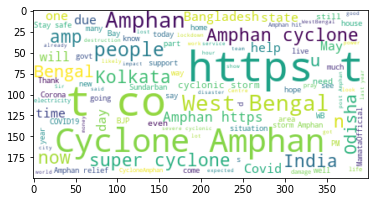

In [51]:
tweet = " ".join(review for review in df.content)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
# plt.set_title('All Tweets', fontsize=30)


In [52]:
df['ct'] = df['ct'].apply(lambda x: re.sub('go',' ',x))
df['ct'] = df['ct'].apply(lambda x: re.sub('come', ' ', x))
df['ct'] = df['ct'].apply(lambda x: re.sub('take', ' ', x))


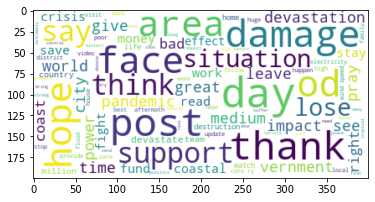

In [53]:
tweet = " ".join(review for review in df.ct)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(tweet)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
# plt.set_title('All Tweets', fontsize=30)


In [54]:
df = df[df['ct'].apply(lambda x: len(x.split()) >=3)]



## Output processed data

In [55]:
df.to_csv('data_cleaned_1.csv',index=False,header=True)

In [56]:
df.ct

1                      thank information predict disastrous
2                        century matter catch drug peddling
4                                       left climate crisis
5          claim stardom believe night life floor apartment
6         area southwest coast hard food time live price...
                                ...                        
134266                           understand produce musical
134273                     see fantastic sort gross theater
134285                                 pick pair glass cool
134295                               orchestra listen music
134296                        homework listen music instead
Name: ct, Length: 51811, dtype: object